In [1]:
#Importing the important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing the Dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


From the above dataset we can see that, there are 13 columns and 614 rows.Loan Status is the output variable i.e the dependent variable. All other varibales like loan id, gender, married, dependents, education are the independent variables.This is a classification problem. There are also null values in the dataset. All the independent variable helps us to predict whether the loan application status of the person should be approved or not.


In [4]:
df.shape

(614, 13)

The number of rows and columns in the dataset.

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

The name of each and every column. The loan id is the unique id of each applicant. Gender tells whether the person is male or female. Married features tells us whether the preson is married or not. Dependents shows how many members in the family is dependent on the loan applicant.Education tells us how much the person is educated. We also look out if the person is self employed or salaried. We may also look out for the applicant income and co applicant income also the loan ammount he has apllied for and the most important is the credit histroy of the person whether he has any previous loans or not or he is not the defaulter. After taking all these factors into account we may check whether the person is illegible for laon or not.

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The data types of each and every column is either object or float.

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As we could see that in some of the features there are missing values present and we should replace these missing values to get the best results.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


This tells us the count of each column and the datatypes of each columns.

In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Univariant, Bivariant, Multivariant Analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

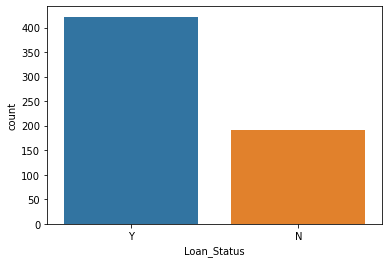

In [10]:
sns.countplot(df['Loan_Status'])

From above plot we can see that there is difference between the two categories of Loan Status we will use smote technique to balance it.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

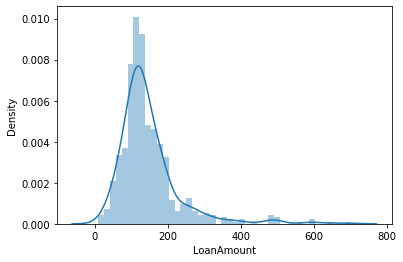

In [13]:
sns.distplot(df['LoanAmount'],kde=True)

The above plot shows the presence of skewness in the data and this could be because of outliers present in the dataset.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

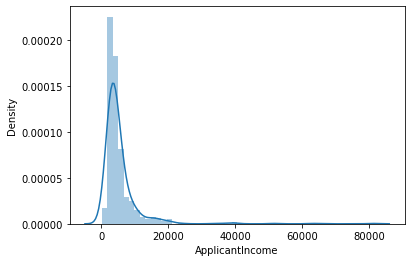

In [19]:
sns.distplot(df['ApplicantIncome'])

The above plot predicts the skewness.

<AxesSubplot:xlabel='Education', ylabel='count'>

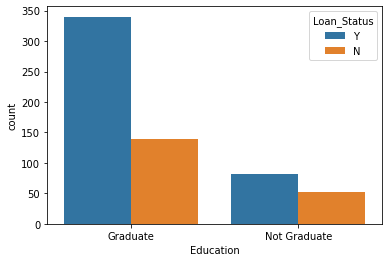

In [20]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

We can say that from above plot maximum loan cases are approved for the persons who are graduate.

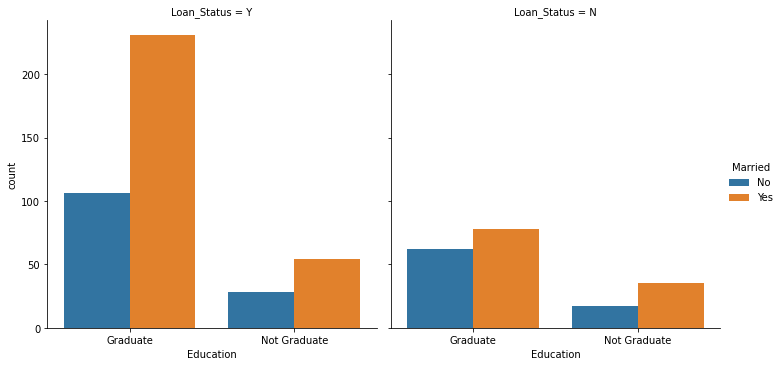

In [15]:
sns.catplot(x="Education",hue="Married",col="Loan_Status",data=df,kind="count")

Persons who are graduated as well as married the maximum loan status is approved for them.

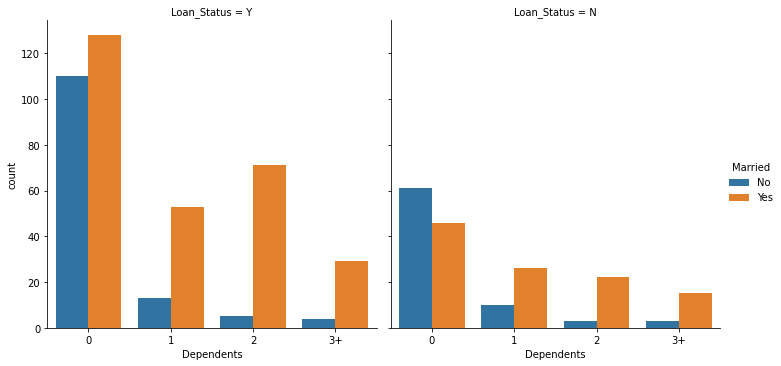

In [16]:
sns.catplot(x="Dependents",hue="Married",col="Loan_Status",data=df,kind="count")

Persons having 0 dependents on them as well as they are married maximum loan cases are approved for them.

# Data Preprocessing/Cleaning

<AxesSubplot:>

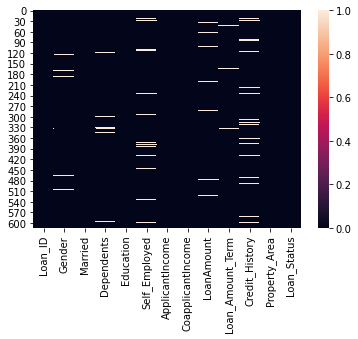

In [21]:
sns.heatmap(df.isnull())

The blank spaces in the above map says that we have missing values in the various features and we need to get rid of thoes values.

## Dealing with Missing values.....

In [22]:
df['Gender'].value_counts()  #replacing Nan with mode values as it is a categorial data

Male      489
Female    112
Name: Gender, dtype: int64

In [23]:
df['Gender'].fillna('Male',inplace=True)

In [24]:
df['Married'].value_counts() #replacing Nan with mode values as it is a categorial data

Yes    398
No     213
Name: Married, dtype: int64

In [25]:
df['Married'].fillna('Yes',inplace=True)

In [26]:
df['Dependents'].value_counts() #replacing Nan with mode values as it is a categorial data

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [27]:
df['Dependents'].fillna(0,inplace=True)

In [28]:
df['Self_Employed'].value_counts() #replacing Nan with mode values as it is a categorial data

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [29]:
df['Self_Employed'].fillna('No',inplace=True)

In [30]:
df['LoanAmount'].mean()  #replacing Nan with mean value as it is a continous data.

146.41216216216216

In [31]:
df['LoanAmount'].fillna(146.4,inplace=True)

In [33]:
df['Loan_Amount_Term'].mean() #replacing Nan with mean value as it is a continous data.

342.0

In [34]:
df['Loan_Amount_Term'].fillna(342,inplace=True)

In [35]:
df['Credit_History'].value_counts() #replacing Nan with mode values as it is a categorial data

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [36]:
df['Credit_History'].fillna(1,inplace=True)

In [37]:
df.dtypes  #checking the datatypes of each column after replacing with NaN value.

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [38]:
df.isnull().sum()  

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we could see that we have successfully elminated all the null values in our dataset.

## Feature Engineering

In [41]:
df.drop('Loan_ID', axis=1, inplace=True)

As we can see that....loan id doesnot play any important role in predicting the loan application status we can drop the column and we will not perform VIF factor calculation as furthur elimination of columns can lead to loss of importnat information.

## Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
name=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
for val in name:
    df[val]=le.fit_transform(df[val].astype(str))


In [43]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.4,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


As we have may columns with categorial data.....we need to convert them to integer so as to perfrom furthur action on our dataset.

In [44]:
df.dtypes #all the object data type converted into numeric data type.

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

<AxesSubplot:>

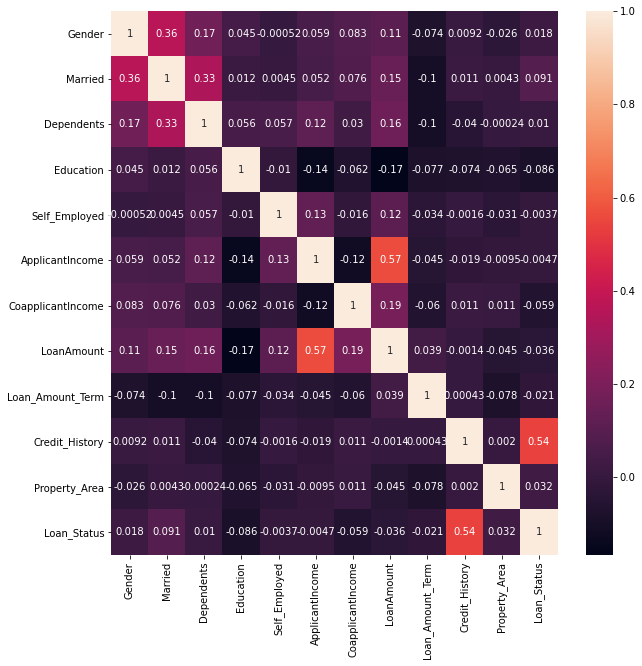

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

From the above heatmap we can say that laon ammount and applicant income are positivly corelated i.e loan amount will depend upon applicant income. Credit History contributing the most in predicting the loan status. if the credit history of the person is poor loan that means the person is the defaulter and the loan status will we rejected.

In [47]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.411726,342.000000,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


From above we can say that mean is more that 50% of data in columns like applicant income, loan ammount, coapplicant income we can that skewness in present in the data. There is a large gap in 75% and the max value which shows the presence of outliers.

## Skewness and Outliers

In [294]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726617
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

As we could see that the data is highly skewed....we need to remove the skewness or we can say that the skewness can be because of outliers present in the dataset we should aslo remove outliers so as to reduce the skewness.

In [295]:
from scipy.stats import zscore
zp=np.abs(zscore(df))   #removing outliers present the dataset
zp
threshold=3
print(np.where(zp>3))
df_new=df[(zp<3).all(axis=1)]
df_new

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.4,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


After removing outliers we can see that rows are reduced from 614 to 577.

In [296]:
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113161
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

After removing outliers still the skewness is present we may go for power transformation yeo-johnnson method to reduce the furthur skewness.

## Dividing the Dataset into Dependent(Y) and Independent (X) Variable.

In [297]:
x=df_new.iloc[:,0:-1]  #independent variable.
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.4,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [298]:
y=df_new.iloc[:,-1]  #dependent variable.
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

In [299]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')   # to remove skewness
x


array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.14260892,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.41851254, -1.34019905],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.14260892,
         0.41851254,  1.1948064 ],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.14260892,
         0.41851254,  1.1948064 ],
       [-2.09583477, -1.36251079, -0.80924269, ...,  0.14260892,
        -2.38941464,  0.01546372]])

In [300]:
# Standard scaling is performed to bring them on the same scale.
from sklearn.preprocessing import StandardScaler 
mn=StandardScaler()
x=mn.fit_transform(x)
x

array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.14260892,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.41851254, -1.34019905],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.14260892,
         0.41851254,  1.1948064 ],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.14260892,
         0.41851254,  1.1948064 ],
       [-2.09583477, -1.36251079, -0.80924269, ...,  0.14260892,
        -2.38941464,  0.01546372]])

## SMOTE

In [301]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()      #SMOTE to balance the target variable.
x_res,y_res=smt.fit_resample(x,y)

In [302]:
y.shape

(577,)

In [303]:
y_res.value_counts()

0    398
1    398
Name: Loan_Status, dtype: int64

# Performing Algorithms

In [333]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [305]:
maxacc=0  #finding the best random state
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxacc:
        maxacc=accu
        maxrs=i
print("best accuracy is",round(maxacc,2),"at random state",maxrs)

best accuracy is 0.89 at random state 12


In [306]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_res,y_res,test_size=.30,random_state=12)

# Logistic Regression

In [309]:
lm=LogisticRegression()
lm.fit(x_train1,y_train1)
pred=lm.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)

accuracy score 0.7364016736401674
              precision    recall  f1-score   support

           0       0.86      0.56      0.68       118
           1       0.68      0.91      0.78       121

    accuracy                           0.74       239
   macro avg       0.77      0.73      0.73       239
weighted avg       0.77      0.74      0.73       239



# Support Vector Classifier

In [307]:
svc1=SVC(kernel="rbf",probability=True)
svc1.fit(x_train1,y_train1)
pred=svc1.predict(x_test1)
print("Accuracy score",accuracy_score(y_test1,pred))
print(classification_report(y_test1,pred))

Accuracy score 0.7447698744769874
              precision    recall  f1-score   support

           0       0.87      0.57      0.69       118
           1       0.69      0.92      0.78       121

    accuracy                           0.74       239
   macro avg       0.78      0.74      0.74       239
weighted avg       0.78      0.74      0.74       239



# Decision Tree Classifier

In [308]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train1,y_train1)
pred=dtc.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)

accuracy score 0.7907949790794979
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       118
           1       0.81      0.77      0.79       121

    accuracy                           0.79       239
   macro avg       0.79      0.79      0.79       239
weighted avg       0.79      0.79      0.79       239



# Random Forest Classifier

In [313]:
rf=RandomForestClassifier()
rf.fit(x_train1,y_train1)
pred=rf.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)

accuracy score 0.8493723849372385
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       118
           1       0.83      0.88      0.86       121

    accuracy                           0.85       239
   macro avg       0.85      0.85      0.85       239
weighted avg       0.85      0.85      0.85       239



# Ada Boost Classifier

In [315]:
ad=AdaBoostClassifier()
ad.fit(x_train1,y_train1)
pred=ad.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)


accuracy score 0.7322175732217573
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       118
           1       0.72      0.76      0.74       121

    accuracy                           0.73       239
   macro avg       0.73      0.73      0.73       239
weighted avg       0.73      0.73      0.73       239



# Cross Validation Score

In [310]:
print(cross_val_score(svc1,x,y,cv=5).mean()) #support vector calssifier

0.8180809595202397


In [311]:
print(cross_val_score(dtc,x,y,cv=5).mean()) #decision tree classifier

0.7106896551724138


In [312]:
print(cross_val_score(lm,x,y,cv=5).mean()) #logistic regression

0.8198200899550224


In [314]:
print(cross_val_score(rf,x,y,cv=5).mean())  #random forest classifier

0.8007346326836581


In [316]:
print(cross_val_score(ad,x,y,cv=5).mean())   #ada boost classifier

0.7886356821589204


on comparing the cross validation score and accuracy score of each model logistic model, support vector and ada boost models are giving cross validations more that accuracy score which shows there could be the possibility of over fitting. Comparing decision tree and Random Forest classifier the latter is giving us the best results with accuracy of 85% and cross validates at 80% we will go with random forest classifier.

## AUC_ROC CURVE AND SCORE

In [338]:
y_pred_prob=rf.predict_proba(x_test1)[:,1]
y_pred_prob

array([0.56, 0.16, 0.  , 0.55, 0.93, 0.19, 0.7 , 0.04, 0.85, 0.58, 0.01,
       0.34, 0.33, 0.13, 0.45, 0.86, 0.88, 0.  , 0.95, 0.7 , 0.04, 0.52,
       0.48, 0.63, 0.59, 0.59, 0.97, 0.02, 0.16, 0.71, 0.58, 0.16, 0.52,
       0.27, 0.09, 0.83, 0.95, 0.3 , 0.83, 0.84, 0.8 , 0.11, 0.71, 0.04,
       0.72, 0.52, 0.66, 0.3 , 0.49, 0.  , 0.11, 0.32, 0.31, 0.17, 0.47,
       0.63, 0.33, 0.09, 0.55, 0.26, 0.68, 0.95, 0.62, 0.93, 0.82, 0.29,
       0.06, 0.08, 0.17, 0.64, 0.99, 0.43, 0.55, 0.86, 0.75, 0.54, 0.01,
       0.25, 0.99, 0.02, 0.4 , 0.54, 0.48, 0.86, 0.02, 0.67, 0.19, 0.24,
       0.51, 0.77, 0.85, 0.72, 0.06, 0.78, 0.37, 0.72, 0.58, 0.04, 0.2 ,
       0.01, 0.68, 0.37, 0.7 , 0.9 , 0.86, 0.03, 0.95, 0.06, 0.68, 0.08,
       0.97, 0.81, 0.66, 0.01, 0.82, 0.74, 0.83, 0.09, 0.54, 0.13, 0.32,
       0.58, 0.72, 0.02, 0.54, 0.38, 0.  , 0.09, 0.53, 0.  , 0.  , 0.65,
       0.12, 0.04, 0.67, 0.02, 0.26, 0.6 , 0.08, 0.61, 0.43, 1.  , 0.94,
       0.88, 0.25, 0.72, 0.76, 0.7 , 0.65, 0.77, 0.

In [339]:
fpr,tpr,thresholds=roc_curve(y_test1,y_pred_prob)

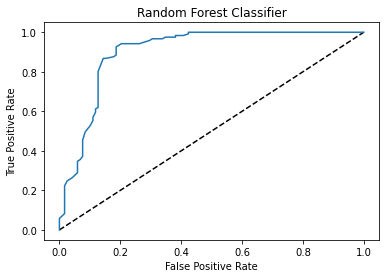

In [340]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier")
plt.show()

In [341]:
auc_score=roc_auc_score(y_test1,rf.predict(x_test1))
auc_score

0.8489284213475278

The roc score is almost equivalent to accuracy score.

## Hyper Parameter Tuning Using GridSearchCV

In [342]:
parameter={"criterion":['gini','entropy'],
           "max_depth":np.arange(2,20),
          "max_features":["auto","log2","sqrt"],
          "bootstrap":[True,False],
          "oob_score":[True,False]}

In [343]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [344]:
gcv.fit(x_train1,y_train1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'oob_score': [True, False]})

In [345]:
gcv.best_params_ 

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'oob_score': False}

# Final Model

In [346]:
final=RandomForestClassifier(criterion="gini",max_depth=15,bootstrap=False,max_features="auto",oob_score=False)
final.fit(x_train1,y_train1)
pred=final.predict(x_test1)
print("Accuracy Score",accuracy_score(y_test1,pred))
print("Classification Report\n",classification_report(y_test1,pred))
print(confusion_matrix(y_test1,pred))

Accuracy Score 0.8535564853556485
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       118
           1       0.84      0.88      0.86       121

    accuracy                           0.85       239
   macro avg       0.85      0.85      0.85       239
weighted avg       0.85      0.85      0.85       239

[[ 98  20]
 [ 15 106]]


# Saving the Model

In [347]:
import joblib
joblib.dump(final,"loan.pkl")

['loan.pkl']